In [1]:
import qiskit as q #IBM package for quantum computing
%matplotlib inline

In [48]:
circuit =q.QuantumCircuit(2,2) # 2qbits,2 bits ( initialized at 0 0)
#circuit.x(0)not flip on first qbit if we want
circuit.h(0) # put the first qbit into a superposition ( it's in both states while not observed yet)
circuit.cx(0,1) #controlled not : flip 2nd qbit if first is one 

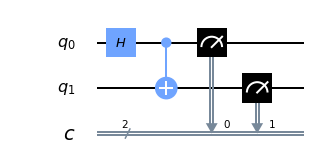

In [49]:
circuit.measure([0,1],[0,1]) #from initialized qbits to our normal bits
circuit.draw(output="mpl")

In [50]:
from qiskit import IBMQ
IBMQ.save_account("")

Credentials already present. Set overwrite=True to overwrite.


In [51]:
IBMQ.load_account()  #it will allow us to use the IBMQ backends ( like ibmq simulator)

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [52]:
provider=IBMQ.get_provider("ibm-q")

In [53]:
for backend in provider.backends():#this will allow us to check on all the existing backends and choose the queue with the lowest value
    try:
        qubit_count=len(backend.properties().qubits)
    except:
        qubit_count="simulated"
    print(f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits")

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 0 queued and 5 qubits
ibmq_16_melbourne has 8 queued and 15 qubits
ibmq_vigo has 0 queued and 5 qubits
ibmq_ourense has 2 queued and 5 qubits
ibmq_london has 1252 queued and 5 qubits
ibmq_burlington has 0 queued and 5 qubits
ibmq_essex has 1 queued and 5 qubits
ibmq_armonk has 0 queued and 1 qubits


In [54]:
from qiskit.tools.monitor import job_monitor
backend=provider.get_backend("ibmqx2")
job=q.execute(circuit,backend=backend,shots=500)#here we will execute our circuit 
job_monitor(job)

Job Status: job has successfully run


In [55]:
from qiskit.visualization import plot_histogram
from matplotlib import style

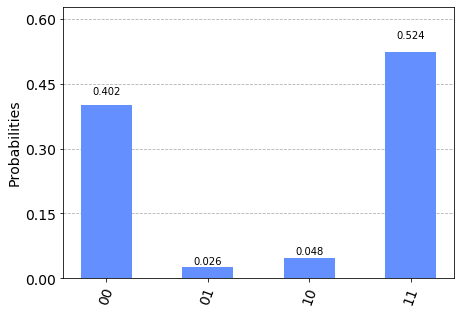

In [56]:
result=job.result() #show all the possibilities ( 2^2=4 possibilities)
counts=result.get_counts(circuit)
plot_histogram([counts])

<p> So mostly we got 11 and 00 at the end of our test (each number corresponds to a bit value), which was expected because the result depends on the first qbits if it's 0 then the result will be 00 , if it's 1 the results will be 1. But,we know that this qubits is in a superoisition state, which means that sometimes is 1 , sometimes 0 and sometimes both! That's why we applied shots , to execute this circuit a lot of times , however we sometimes get other values (01,10)This is noise that depends on probability.</p>